In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
import collections
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.cluster import KMeans
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("reuters")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from nltk.corpus import brown as corpus
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [42]:
for n,item in enumerate(corpus.words(corpus.fileids()[1])[:50]):
    print(item, end=" ")
    if (n%25) ==24:
      print(" ")

Austin , Texas -- Committee approval of Gov. Price Daniel's `` abandoned property '' act seemed certain Thursday despite the adamant protests of Texas bankers  
. Daniel personally led the fight for the measure , which he had watered down considerably since its rejection by two previous Legislatures , in  


In [11]:
corpus.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [15]:
docs=[corpus.words(fileid) for fileid in corpus.fileids()[:]]
print(docs[:5])
print("num of docs:", len(docs))
print(docs[0])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...], ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...], ['Several', 'defendants', 'in', 'the', 'Summerdale', ...], ['Oslo', 'The', 'most', 'positive', 'element', 'to', ...], ['East', 'Providence', 'should', 'organize', 'its', ...]]
num of docs: 500
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [16]:
stopWords = stopwords.words('english')
charfilter = re.compile('[a-zA-Z]+')
#create a tokenizer:
def simple_tokenizer(text):
    #tokenizing the words:
    words = word_tokenize(text)
    #converting all the tokens to lower case:
    words = map(lambda word: word.lower(), words)
    #let's remove every stopwords
    words = [word for word in words if word not in stopWords]
    #stemming all the tokens
    tokens = (list(map(lambda token: PorterStemmer().stem(token), words)))
    ntokens = list(filter(lambda token : charfilter.match(token),tokens))
    return ntokens

In [17]:
vec = TfidfVectorizer(tokenizer = simple_tokenizer, max_features = 1000, norm = 'l2')

In [20]:
train_data = []
train_labels = []
for file in corpus.fileids():
  train_data.append(corpus.raw(file))
  train_labels.append(corpus.categories(file))
  

        

  (0, 648)	0.011028073118176109
  (0, 661)	0.012090402002584906
  (0, 429)	0.011708815337453963
  (0, 800)	0.011992043850390533
  (0, 156)	0.01057560625947393
  (0, 188)	0.010364810820184709
  (0, 772)	0.009664314492549335
  (0, 83)	0.007992076360207781
  (0, 417)	0.011356056158565948
  (0, 926)	0.013886311825617871
  (0, 108)	0.01057560625947393
  (0, 683)	0.00932231992594913
  (0, 255)	0.012728461004426117
  (0, 812)	0.009160274560304936
  (0, 942)	0.014680052884929042
  (0, 56)	0.010838337723119085
  (0, 888)	0.011107935570011402
  (0, 291)	0.01057560625947393
  (0, 1)	0.010097775875163197
  (0, 439)	0.015230316342887126
  (0, 462)	0.0077112804636583635
  (0, 401)	0.03264345494239404
  (0, 427)	0.00972382917848217
  (0, 155)	0.011529107040880249
  (0, 864)	0.010097775875163197
  :	:
  (228, 849)	0.0436913982353672
  (228, 658)	0.014956451898609648
  (228, 279)	0.09164103933667528
  (228, 81)	0.0276657089668984
  (228, 931)	0.006477605605985251
  (228, 114)	0.05390649372745605
  (228

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


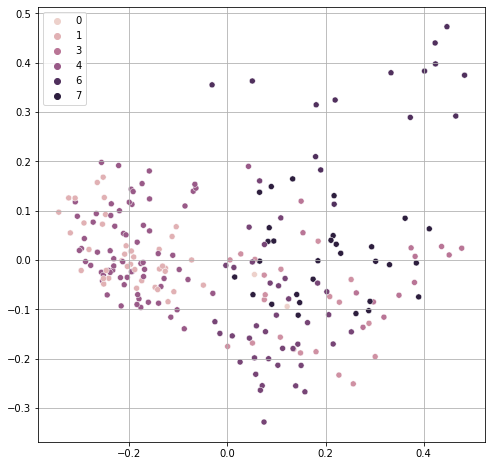

In [22]:
#consider only 8 categories
our_labels = ['adventure','belles_lettres','editorial','fiction','religion','reviews','romance','science_fiction']
docs_train = []
docs_labels = []
for i in range(len(train_labels)):
    if any(item in train_labels[i] for item in our_labels):
        docs_train.append(train_data[i])
        docs_labels.append(train_labels[i])


tf_idf = vec.fit_transform(docs_train)
print(tf_idf)
pca = PCA(60)
pca.fit(tf_idf.toarray())
docs_pca = pca.transform(tf_idf.toarray())
num_clusters = 8
km1 = KMeans(n_clusters=num_clusters)
clusters1 = km1.fit_predict(tf_idf)

#visualising the k means

plt.figure(figsize = (8,8))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue = clusters1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


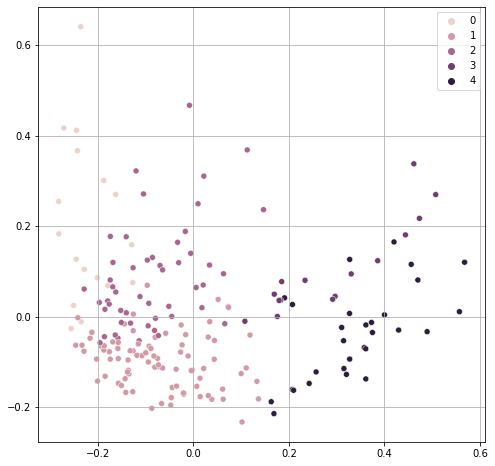

In [24]:
#consider only 5 categories
our_labels2 = ['hobbies','humor','learned','lore','mystery']
docs_train2 = []
docs_labels2 = []
for i in range(len(train_labels)):
    if any(item in train_labels[i] for item in our_labels2):
        docs_train2.append(train_data[i])
        docs_labels2.append(train_labels[i])

tf_idf2 = vec.fit_transform(docs_train2)

pca = PCA(60)
pca.fit(tf_idf2.toarray())
docs_pca = pca.transform(tf_idf2.toarray())
num_clusters = 5
km2 = KMeans(n_clusters=num_clusters)
clusters2 = km2.fit_predict(tf_idf2)

#visualising the k means

plt.figure(figsize = (8,8))
plt.grid()
sns.scatterplot(docs_pca[:, 0], docs_pca[:, 1], hue = clusters2)
plt.show()

In [25]:
km1.inertia_

42.28460342125154

In [26]:
km2.inertia_

55.418005588399645

In [27]:
print(metrics.silhouette_score(tf_idf, clusters1, metric='euclidean'))

0.04913962871595539


In [28]:
print(metrics.silhouette_score(tf_idf2, clusters2, metric='euclidean'))

0.06412397210929281
